In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Census.csv')

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.shape

(32560, 15)

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

this is large data set so we need to check for the repeated or duplicacy in the dataset

In [6]:
df.duplicated().sum()

24

Checking how many Question mark in dataset

In [7]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [8]:
df=df.replace(' ?',np.NaN)

In [9]:
df.isin(['','NA','_']).sum().any()

False

We have Replace '?'with np.NaN
No White Spaces ,NA '_'exist in dataset

In [10]:
df.drop_duplicates(keep='last',inplace=True)

In [11]:
df.shape

(32536, 15)

# Missing Value Check

<AxesSubplot:>

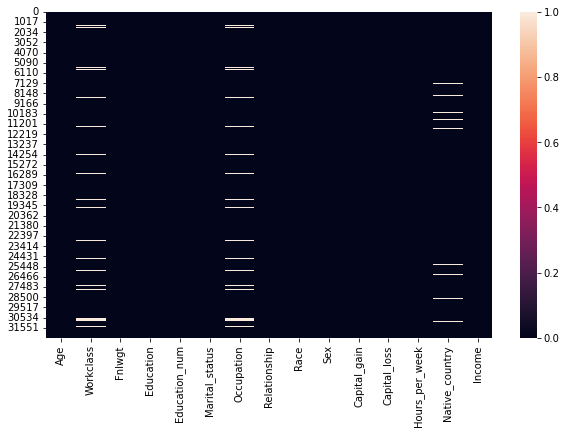

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

There are missing values in occupation,workclass,Native country

In [13]:
missing_values=df.isnull().sum().sort_values(ascending=False)
percentage_missing_values=(missing_values/len(df))*100
print(pd.concat([missing_values,percentage_missing_values],axis=1,keys=['Missing values','% Missing data']))

                Missing values  % Missing data
Occupation                1843        5.664495
Workclass                 1836        5.642980
Native_country             582        1.788788
Age                          0        0.000000
Fnlwgt                       0        0.000000
Education                    0        0.000000
Education_num                0        0.000000
Marital_status               0        0.000000
Relationship                 0        0.000000
Race                         0        0.000000
Sex                          0        0.000000
Capital_gain                 0        0.000000
Capital_loss                 0        0.000000
Hours_per_week               0        0.000000
Income                       0        0.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [15]:
NUmerical=['Age','Fnlwgt','Education_num','Capital_loss','Hours_per_week']
category=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

# MIssing value impitation

occupation,workclass,Native country are categorical variable so we can impute them with mode of feature

In [16]:
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

Missing Value check after Imputation

In [17]:
missing_values=df.isnull().sum().sort_values(ascending=False)
percentage_missing_values=(missing_values/len(df)*100)
print(pd.concat([missing_values,percentage_missing_values],axis=1,keys=['Missing values','%Missing data']))

                Missing values  %Missing data
Age                          0            0.0
Workclass                    0            0.0
Fnlwgt                       0            0.0
Education                    0            0.0
Education_num                0            0.0
Marital_status               0            0.0
Occupation                   0            0.0
Relationship                 0            0.0
Race                         0            0.0
Sex                          0            0.0
Capital_gain                 0            0.0
Capital_loss                 0            0.0
Hours_per_week               0            0.0
Native_country               0            0.0
Income                       0            0.0


Finally Now, we were yes to go further

# Statistical Analysis

<AxesSubplot:>

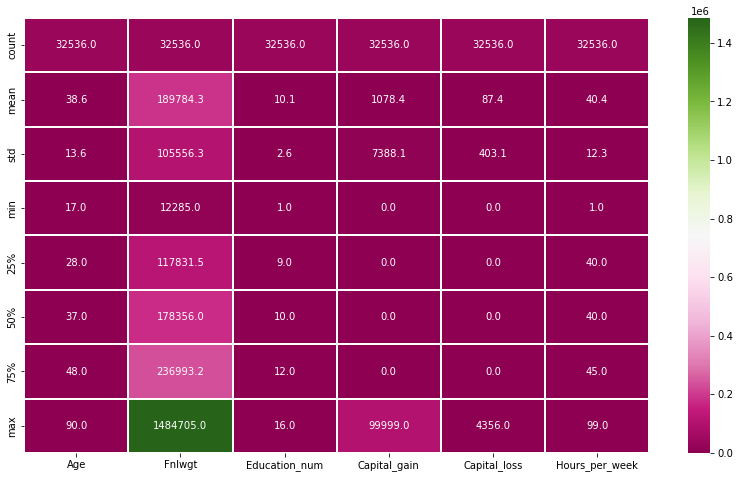

In [18]:
plt.figure(figsize=(14,8))
sns.heatmap(df.describe(),linewidths=0.1,fmt='0.1f',annot=True,cmap='PiYG')

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


Max and Min age of people is 17 and 90years While avg age is 37

min and max years spend on education is 1 and 16

capital gain min and average capital is 0 ,maximum is 99999,This seems odd may be some error within data collection

In [20]:
for i in category:
    print(i)
    print(df[i].value_counts())
    print('_'*100)

Workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
____________________________________________________________________________________________________
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
____________________________________________________________________________________________________
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated             

# EDA

# Start EDA by analysing our target variable first

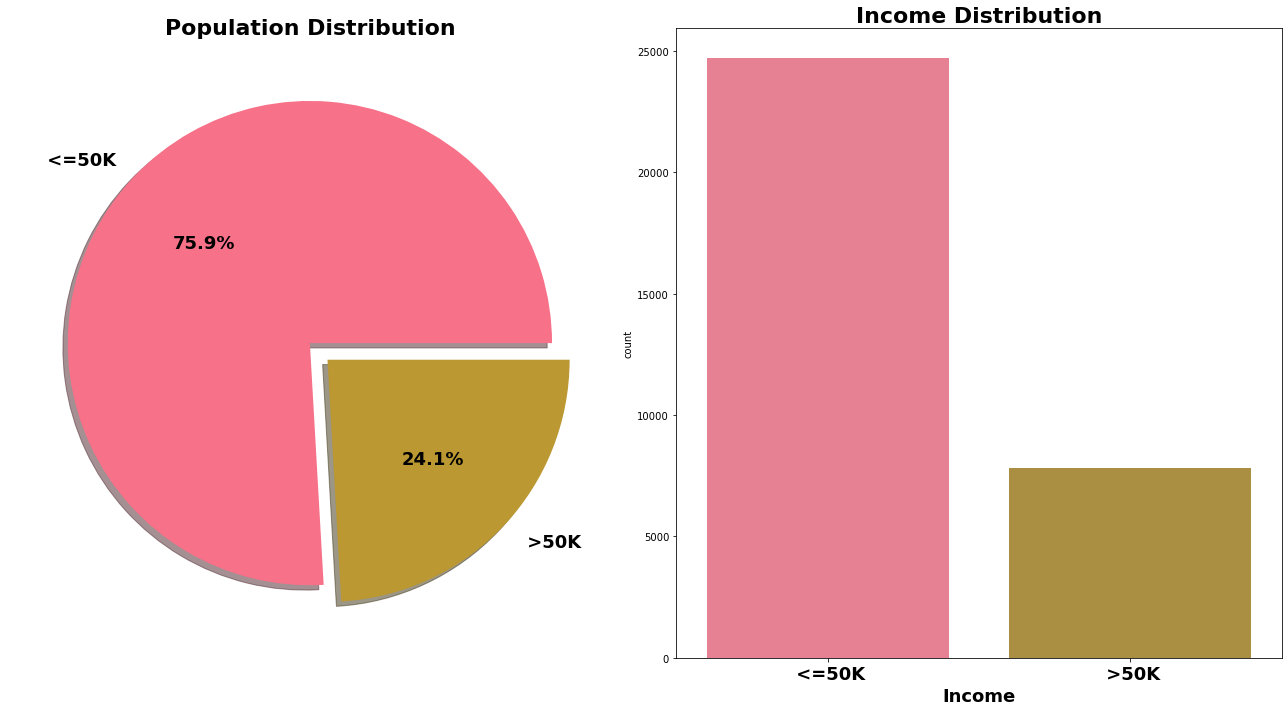

In [20]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['Income'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                     textprops = {'fontweight':'bold','fontsize':18},ax=ax[0], shadow=True)
ax[0].set_title('Population Distribution',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Income',data=df,ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=22,fontweight='bold')
ax[1].set_xlabel("Income",fontsize=18,fontweight='bold')
plt.xticks(fontsize=18,fontweight='bold')
plt.show()

75.9% population have income less that 50 k.

we need to predict iincome and we need to nsee that target variable income is imbalanced

In [21]:
def age_group(x):
    x=int(x)
    x=abs(x)
    if(18<x<31):
        return"19-30"
    if(30<x<41):
        return'31-40'
    if(40<x<51):
        return'41-50'
    if(50<x<71):
        return"51-60"
    if(60<x<71):
        return"61-70"
    else:
        return 'Greater Than 70'

In [22]:
df['age_group']=df['Age'].apply(age_group)

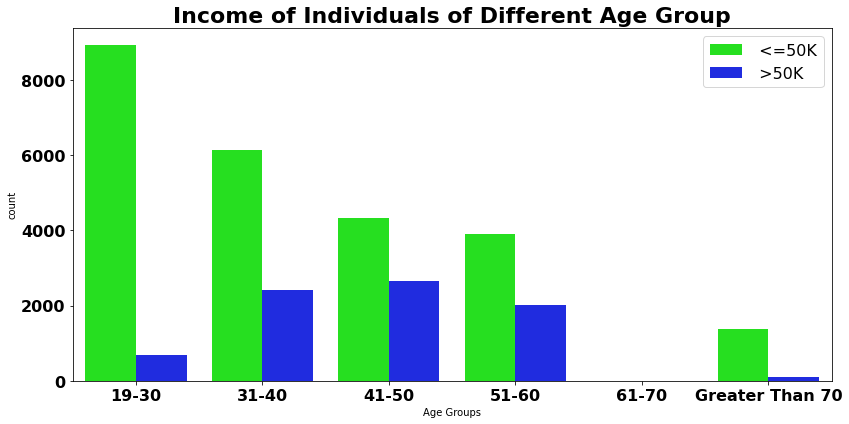

In [23]:
plt.figure(figsize=(12,6))
order_list=['19-30','31-40','41-50','51-60',"61-70",'Greater Than 70']
p=sns.countplot(df['age_group'],hue=df['Income'],palette='hsv',order=order_list)
plt.title('Income of Individuals of Different Age Group',fontsize=22,fontweight='bold')
p.set_xlabel('Age Groups')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(fontsize=16)
plt.show()

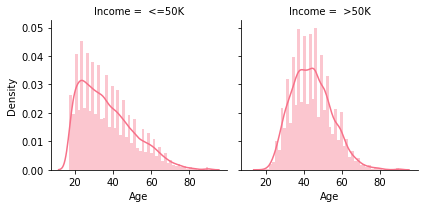

In [24]:
# Distribution of age with income categories
ax= sns.FacetGrid(df,col='Income')
ax.map(sns.distplot,'Age')
plt.show()

almost 10 % people in age group of 19-30 earns more than 50 K dollars and this count drop even more in old peoples having age greater than 70. Might be some lucky old ones has created good Retirement Plan compare to rest old peoples.
We can find maximum people earning more than 50K dollors belong to age group 41-50 & 51-60. It will be interesting to find out which profession lead this income to this category.

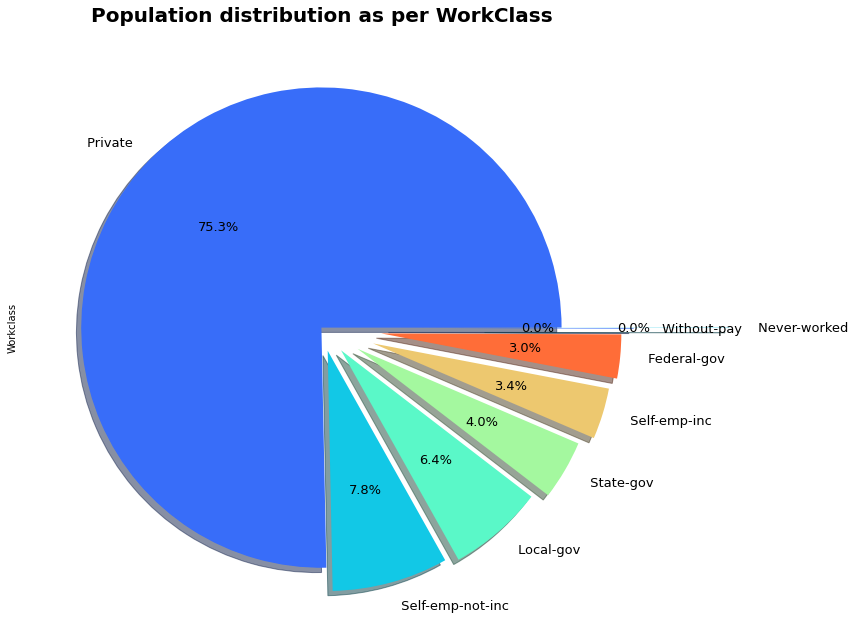

In [25]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('rainbow')
plt.figure(figsize=(12,12))
df['Workclass'].value_counts().plot.pie(explode=[0,0.1,0.125,0.175,0.225,0.25,0.3,0.7],autopct='%2.1f%%',
                                       textprops={'fontsize':13},shadow=True)
plt.title('Population distribution as per WorkClass',fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

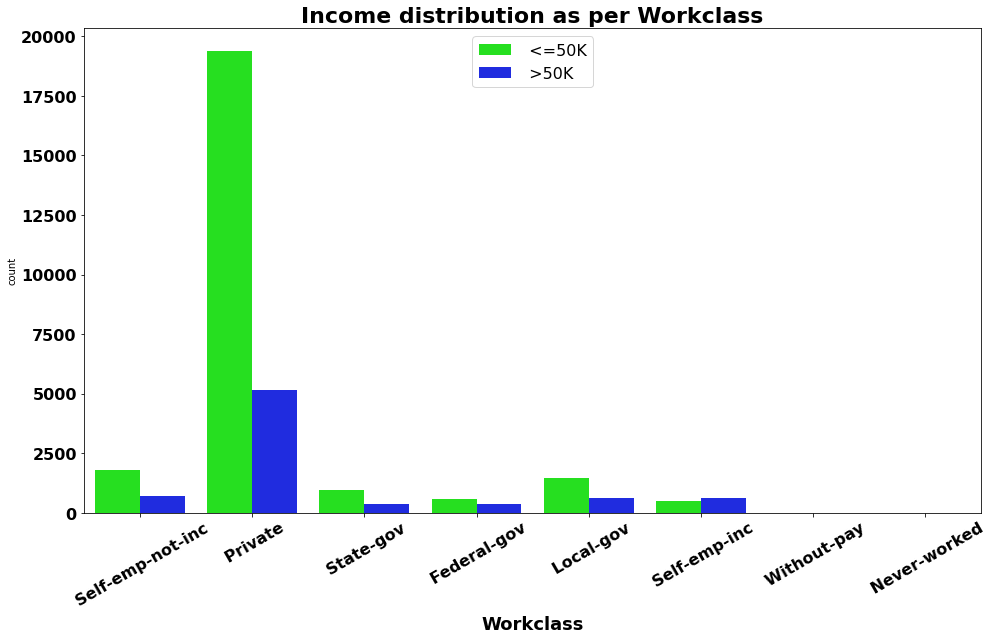

In [26]:
plt.figure(figsize=(14,9))
p=sns.countplot(df['Workclass'],hue=df['Income'],palette='hsv')
plt.title('Income distribution as per Workclass',fontsize=22,fontweight='bold')
p.set_xlabel('Workclass',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold',rotation=30)
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(fontsize=16)
plt.show()

In [27]:
pd.crosstab(df['Income'],df["Workclass"],margins=True).style.background_gradient(cmap='winter_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Income,,,,,,,,,
<=50K,589,1476,7,19357,494,1816,944,14,24697
>50K,371,617,0,5152,622,724,353,0,7839
All,960,2093,7,24509,1116,2540,1297,14,32536


75.3% people belongs to Private sector followed by Self Emplyoed not Incorporated with 7.8 %
Interseting observation comes with Self-Employed Incorporated category where the number of people who earn more than 50K dollars exceed those earning less than it !

There is significant difference between private sector employees income where less than 25 % people earn more than 50K dollars an year.

Another quite surprising insight comes from Federal Goverment countplot where We can see very minute difference between the number of people whose income is more or less than 50K dollars an year. Same goes with state goverment with some difference.

Yes there exist category for who never worked and Working without pay but very few people belong to it.These people may be unempolyeed or colleges students. But Number is less And thats Good 

Certainly Goverment Emplyoees have high wages compare to private 

# Education vs Income

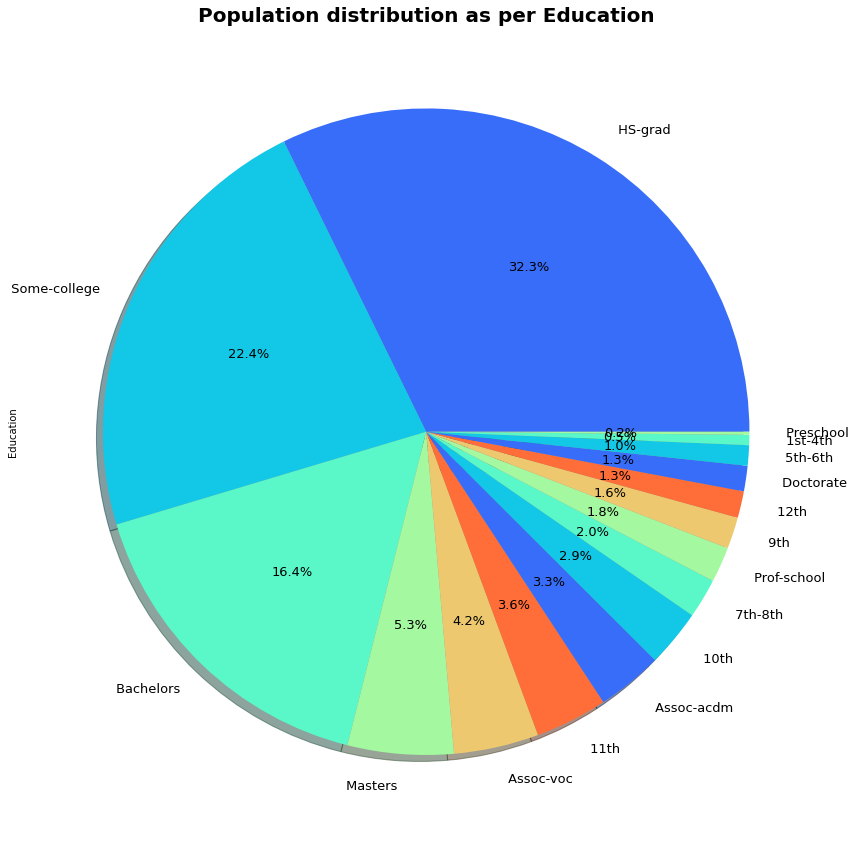

In [28]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('rainbow')
plt.figure(figsize=(12,12))
df['Education'].value_counts().plot.pie(autopct='%2.1f%%',textprops={'fontsize':13},shadow=True)
plt.title('Population distribution as per Education',fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

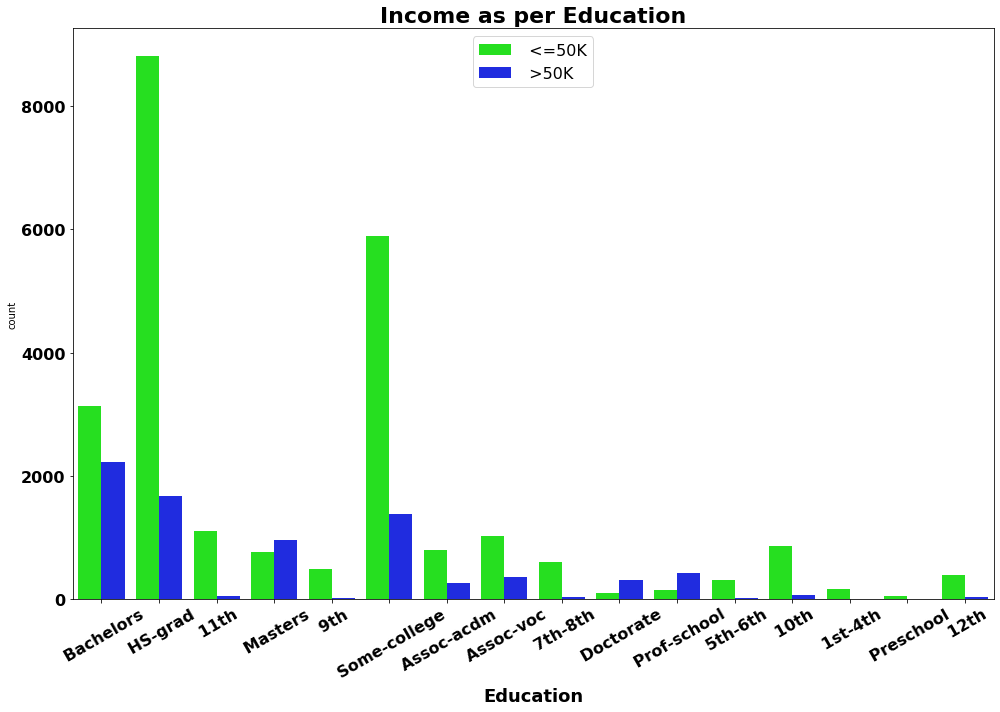

In [29]:
plt.figure(figsize=(14,10))
p=sns.countplot(df['Education'],hue=df['Income'],palette='hsv')
plt.title('Income as per Education',fontsize=22,fontweight='bold')
p.set_xlabel('Education',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold',rotation=30)
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(fontsize=16)
plt.show()

People with HS Grad education is the most prevelant education level

People with masters and doctorate degree holder highly educated people belong to category

There are very handful people who earn more than 50 k having education below 12th

Maximum no of people having 50k salary are bachelors

In [30]:
pd.crosstab(df['Education'],df["Workclass"],margins=True).style.background_gradient(cmap='winter_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Education,,,,,,,,,
10th,6,31,2,795,19,67,13,0,933
11th,9,36,1,1041,14,60,14,0,1175
12th,5,19,0,373,7,19,10,0,433
1st-4th,0,4,0,146,2,13,1,0,166
5th-6th,1,9,0,295,4,19,4,0,332
7th-8th,2,28,1,495,14,94,10,1,645
9th,3,23,0,438,10,34,6,0,514
Assoc-acdm,55,88,0,776,35,71,41,1,1067
Assoc-voc,38,86,0,1066,38,108,46,0,1382


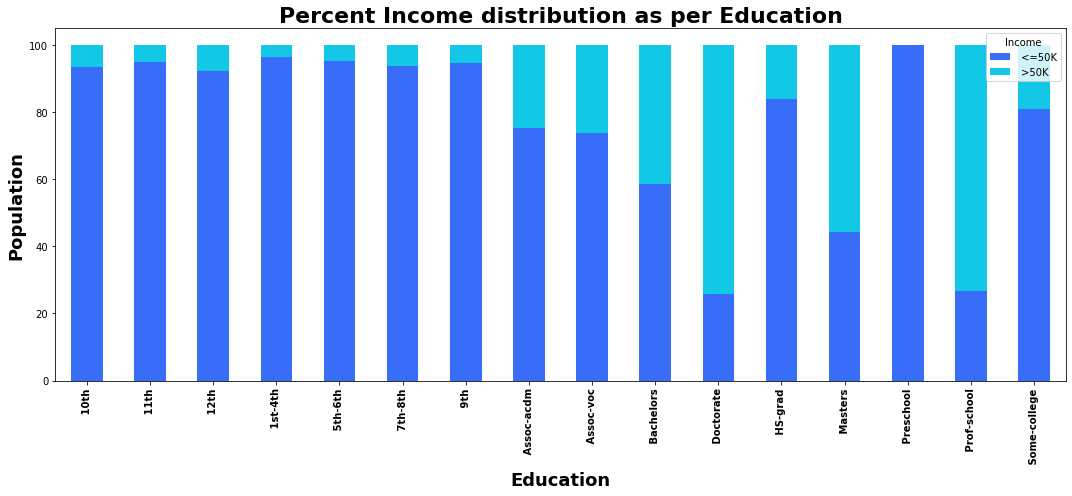

In [31]:
sns.set_palette('rainbow')
table=pd.crosstab(df['Education'],df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,7))
plt.title('Percent Income distribution as per Education',fontsize=22,fontweight='bold')
plt.xlabel('Education',fontsize=18,fontweight='bold')
plt.ylabel('Population',fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

75% Doctorate people earn more than 50 k dollars 

So,Higly earning people comes from Masters and Doctorate Background

We can also see that private sector is highly recruiter for hs-grad people

# Occupation Vs Income

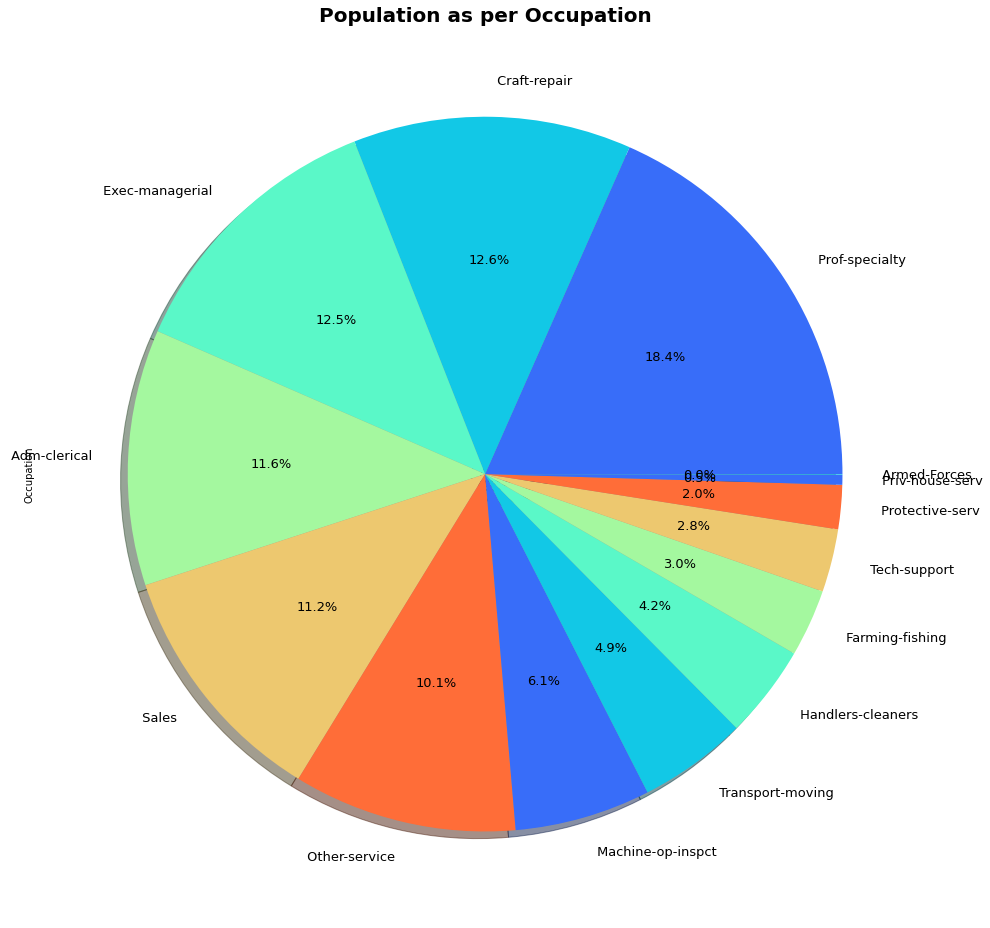

In [32]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('rainbow')
plt.figure(figsize=(15,13))
df['Occupation'].value_counts().plot.pie(autopct='%2.1f%%',textprops={'fontsize':13}, shadow= True)
plt.title('Population as per Occupation',fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

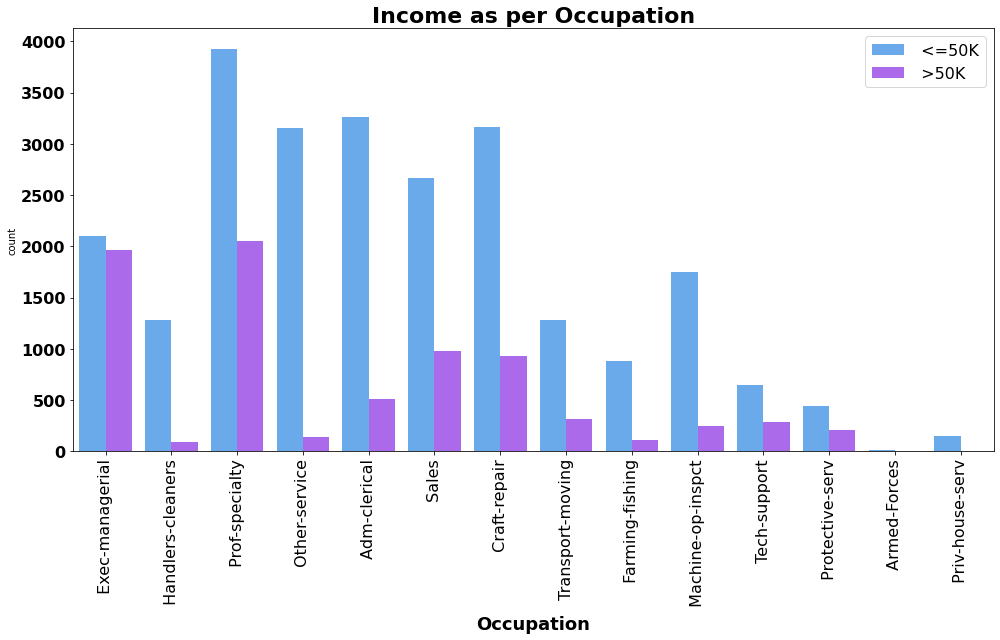

In [33]:
plt.figure(figsize=(14,9))
p=sns.countplot(df['Occupation'],hue=df['Income'],palette='cool')
plt.title('Income as per Occupation',fontsize=22,fontweight='bold')
p.set_xlabel('Occupation',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(fontsize=16)
plt.show()

Exec-managerial role are equally likely to earn more than 50k

people like in armed forces ,farming,machine op inspect ,other servuce are very less likely to earn more than 50 k dollars a year

25% of the people working in sales earn more than 50 k dollars a year

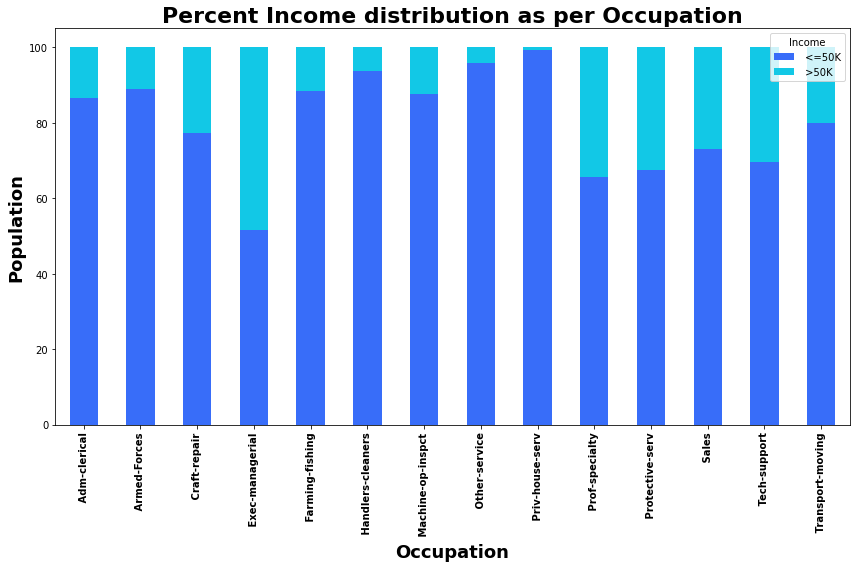

In [34]:
sns.set_palette('rainbow')
table=pd.crosstab(df['Occupation'],df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Occupation',fontsize=22,fontweight='bold')
plt.xlabel('Occupation',fontsize=18,fontweight='bold')
plt.ylabel('Population',fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

In [35]:
pd.crosstab(df['Occupation'],df["Income"],margins=True).style.background_gradient(cmap='summer_r')

Income,<=50K,>50K,All
Occupation,,,
Adm-clerical,3260,507,3767
Armed-Forces,8,1,9
Craft-repair,3165,929,4094
Exec-managerial,2097,1968,4065
Farming-fishing,877,115,992
Handlers-cleaners,1283,86,1369
Machine-op-inspct,1751,249,2000
Other-service,3154,137,3291
Priv-house-serv,146,1,147


Prof-Speciality position with maximum 2049 peoples followed by Exec-managerial position with 1968 people leads chart for greater than 50K dollars an year.

If we talk in term of percentage probablity Exective Managerial position have 50% chances to lead in Greater than 50K dollars Club.

There's close to 33% probablity for an adult in Prof-specialty to earn more than 50K dollars an year.

Minimum chances for Greater than 50K Club comes from Private House Service occupation where 1/147 chance of getting more than 50K dollars an year.

Let check where these different occupation fit with respect to Work class through crosstab.

In [36]:
pd.crosstab(df['Occupation'],df["Workclass"],margins=True).style.background_gradient(cmap='summer_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Occupation,,,,,,,,,
Adm-clerical,317,283,0,2831,31,50,252,3,3767
Armed-Forces,9,0,0,0,0,0,0,0,9
Craft-repair,64,146,0,3191,106,530,56,1,4094
Exec-managerial,180,214,0,2690,400,392,189,0,4065
Farming-fishing,8,29,0,453,51,430,15,6,992
Handlers-cleaners,23,47,0,1272,2,15,9,1,1369
Machine-op-inspct,14,12,0,1911,13,36,13,1,2000
Other-service,35,193,0,2736,27,175,124,1,3291
Priv-house-serv,0,0,0,147,0,0,0,0,147


There are 7 peoples from never worked

Category with High earning profession of prof-seciallity

According to our findings 6 people with exec-managerial possibly they are working with unpaid internship profile

# Relationship Vs Income

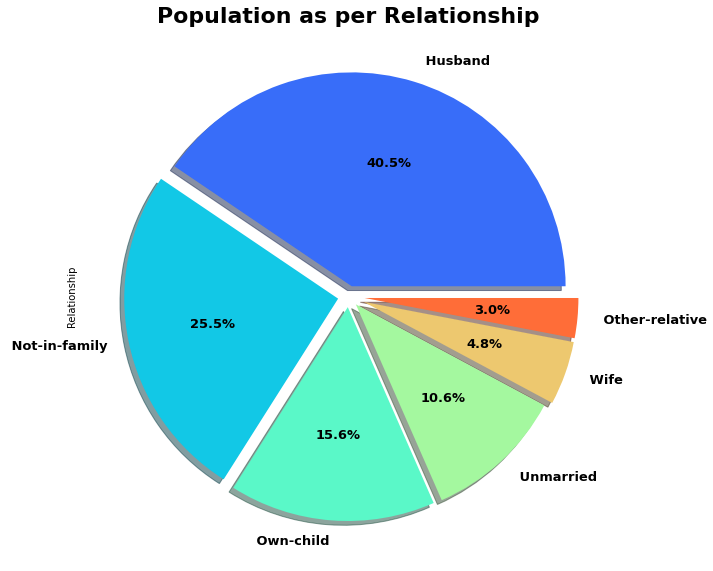

In [37]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Relationship'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075,0.075],
                                          textprops={'fontweight':'bold','fontsize':13},shadow=True)
plt.title('Population as per Relationship',fontsize=22,fontweight='bold')
plt.tight_layout()
plt.show()

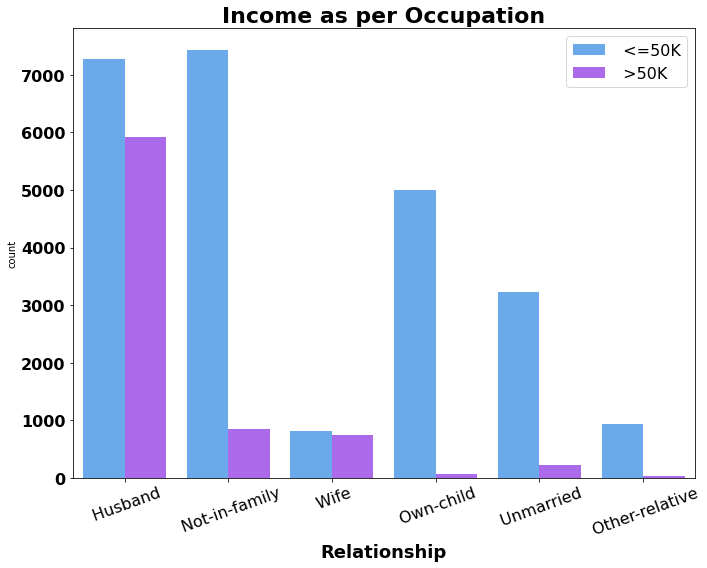

In [39]:
plt.figure(figsize=(10,8))
p=sns.countplot(df['Relationship'],hue=df['Income'],palette='cool')
plt.title('Income as per Occupation',fontsize=22,fontweight='bold')
p.set_xlabel('Relationship',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,rotation=20)
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(fontsize=16)
plt.show()

Wives equally likely to earn more than 50 k dollars an year

For husbands there is less possibility to earn more than 50 k dollars a year

There are just some people Unmarried people earning more than 50 k dollar an year

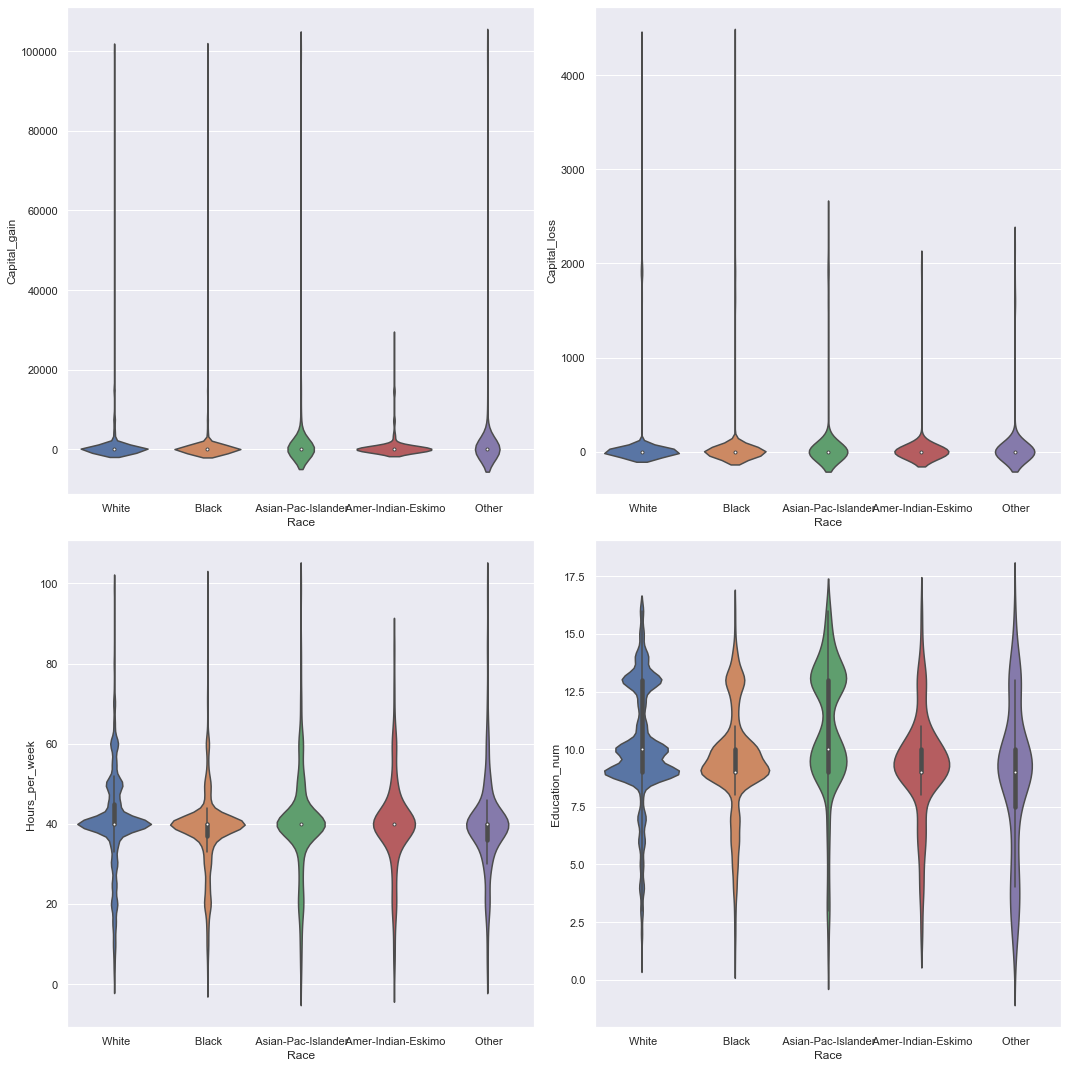

In [40]:
# Setting Parameters
plt.rcParams['figure.figsize'] = [15,15]
sns.set(style = 'darkgrid')

# This Violin plot show how capital gain, loss, hours per week and education vary with the race of the people
plt.subplot(2,2,1)
sns.violinplot(x = df['Race'], y = df['Capital_gain'], data = df);
plt.subplot(2,2,2)
sns.violinplot(x = df['Race'], y = df['Capital_loss'], data = df);
plt.subplot(2,2,3)
sns.violinplot(x = df['Race'], y = df['Hours_per_week'], data = df);
plt.subplot(2,2,4)
sns.violinplot(x = df['Race'], y = df['Education_num'], data = df);

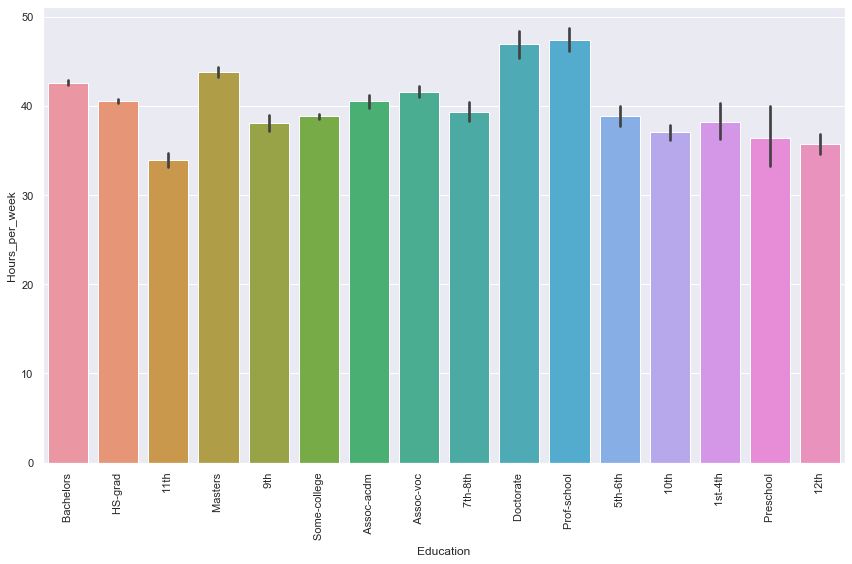

In [41]:
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x=df['Education'],y=df['Hours_per_week'],data=df)
plt.setp(sns_grad.get_xticklabels(),rotation=90)
plt.show()

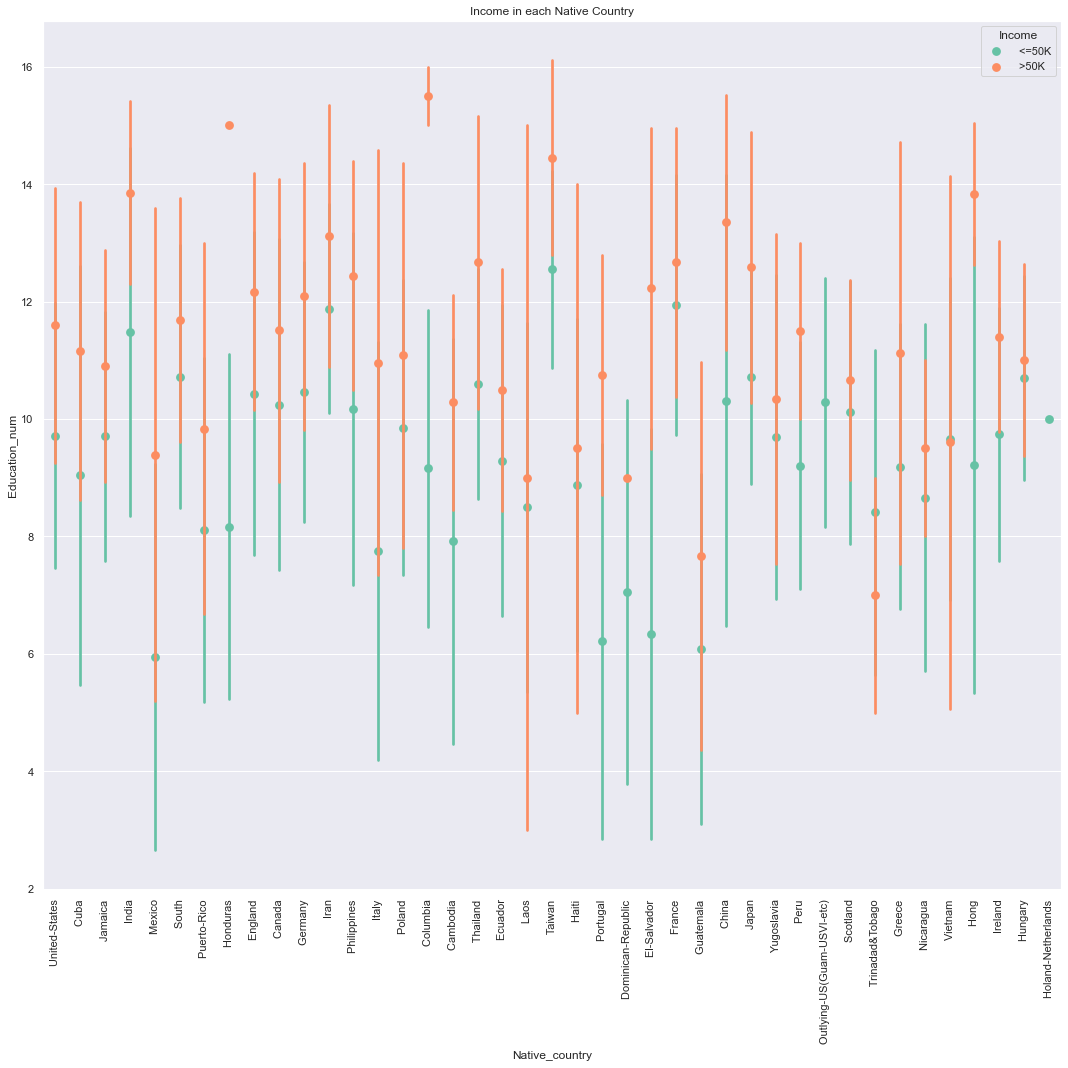

In [42]:
plt.figure(figsize=(15,15))
plt.title("Income in each Native Country")
sns.pointplot(x='Native_country',y='Education_num',data=df,hue='Income',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()

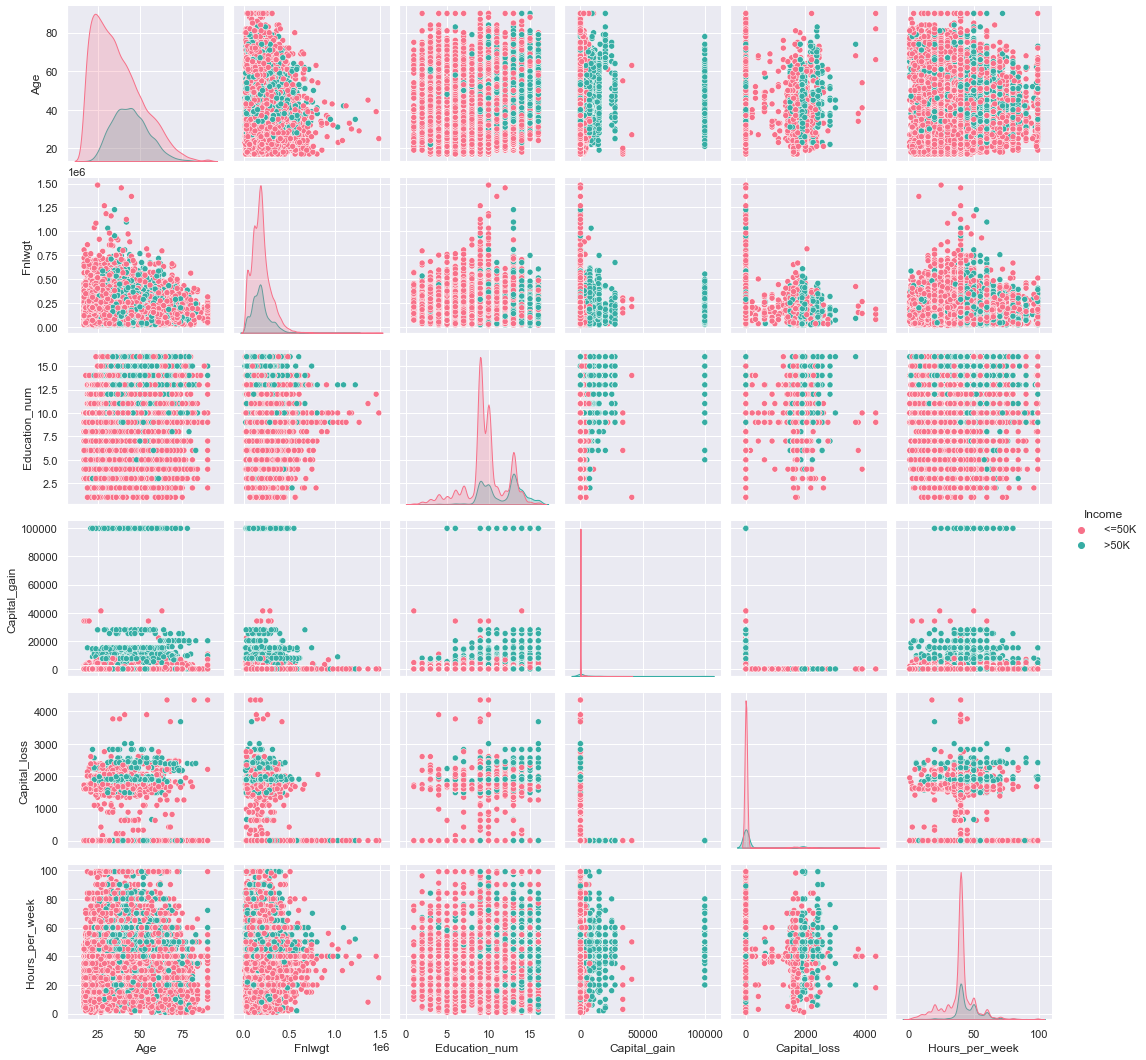

In [43]:
sns.pairplot(df,hue="Income",palette="husl")

In [44]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,41-50
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,31-40
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,51-60
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,19-30
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,31-40


# Encoding Categorical Data

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in category:
    df[i]=le.fit_transform(df[i])
df.head()    

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,41-50
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,31-40
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,51-60
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,19-30
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0,31-40


we can see that outliers exist in dataset